<ipython-input-2-9e201a02bac3>:55: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_train = np.where(y_train == '[0]', '0', y_train)  # Xử lý chuỗi '[0]' thành '0'


Epoch 1/20
4989/4989 [==============================] - 31s 6ms/step - loss: 1.2679 - accuracy: 0.6804 - val_loss: 0.8945 - val_accuracy: 0.7513
Epoch 2/20
4989/4989 [==============================] - 29s 6ms/step - loss: 0.8938 - accuracy: 0.7478 - val_loss: 0.7896 - val_accuracy: 0.7682
Epoch 3/20
4989/4989 [==============================] - 28s 6ms/step - loss: 0.8014 - accuracy: 0.7681 - val_loss: 0.7518 - val_accuracy: 0.7759
Epoch 4/20
4989/4989 [==============================] - 29s 6ms/step - loss: 0.7512 - accuracy: 0.7785 - val_loss: 0.6989 - val_accuracy: 0.7952
Epoch 5/20
4989/4989 [==============================] - 28s 6ms/step - loss: 0.7152 - accuracy: 0.7861 - val_loss: 0.6866 - val_accuracy: 0.7965
Epoch 6/20
4989/4989 [==============================] - 28s 6ms/step - loss: 0.6882 - accuracy: 0.7923 - val_loss: 0.6714 - val_accuracy: 0.8015
Epoch 7/20
4989/4989 [==============================] - 29s 6ms/step - loss: 0.6700 - accuracy: 0.7952 - val_loss: 0.6493 - val_ac

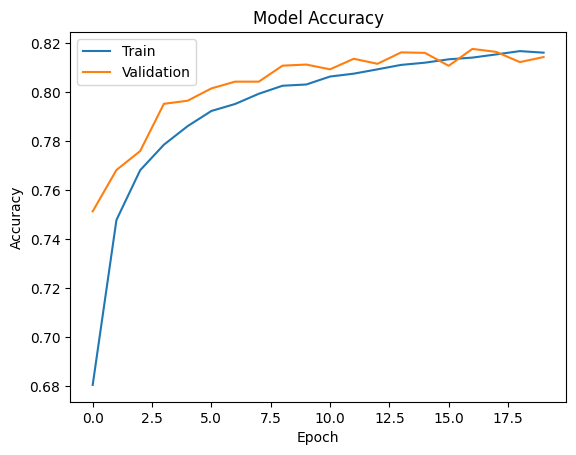

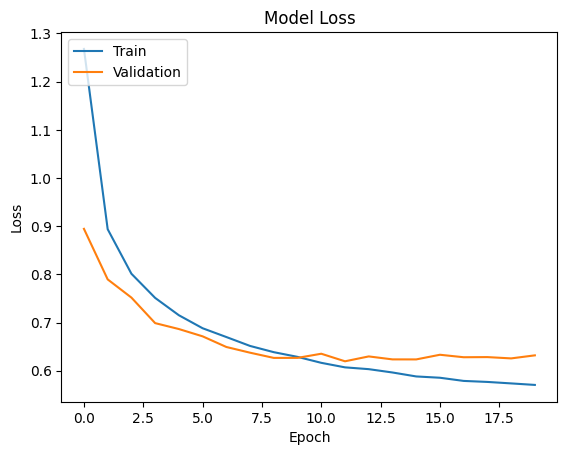

621/621 [==============================] - 2s 3ms/step
Accuracy Score: 0.8153683574879227
Precision Score: 0.8137763449370647
Recall Score: 0.8153683574879227
F1 Score: 0.800715362061873

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.98      0.98      8679
           2       0.62      0.72      0.66      2344
           3       0.86      0.94      0.89       487
           4       0.97      0.79      0.87       400
           5       0.71      0.42      0.52       392
           6       0.93      0.48      0.64       358
           7       0.98      1.00      0.99       289
           8       0.99      0.99      0.99       257
           9       0.45      1.00      0.62       256
          10       0.66      0.76      0.70       251
          11       0.88      0.97      0.92       236
          12       0.65      0.87      0.74       229
          13       0.98      0.87      0.92       226
          14       0.82      0.9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWa

In [2]:
import pandas as pd
from numpy import mean
from numpy import std
import numpy as np
import timeit
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from keras.layers import Input, Dense, Flatten, Dropout
from keras.models import Model
import matplotlib.pyplot as plt
import json
SIZE = 27
from tensorflow.keras.callbacks import EarlyStopping
PADDING = 46

def load_data(data_train, data_val, data_test):
    train = pd.read_csv(data_train)
    val = pd.read_csv(data_val)
    test = pd.read_csv(data_test)
    return train, val, test

def preprocess_data(data, max_values_dict):
    x = data.drop(['file_name', 'label', 'category_name', 'category_encoding', 'malware_family', 'family_encoding'], axis=1)
    y = data['family_encoding']

    for feature in x.columns:
        max_value = max_values_dict.get(feature, 1)
        if max_value == 0:
            x[feature] = 0
        else:
            x[feature] = x[feature] / max_value

    return x, y

data = []

def prepare_data(train, val, test, max_values_dict):

    x_train, y_train = preprocess_data(train, max_values_dict)
    x_val, y_val = preprocess_data(val, max_values_dict)
    x_test, y_test = preprocess_data(test, max_values_dict)


    y_train = np.array(y_train)  # Chuyển đổi y_train thành một mảng numpy
    y_train = np.where(y_train == '[0]', '0', y_train)  # Xử lý chuỗi '[0]' thành '0'

    SIZE = 27
    PADDING = 46

    x_train_deep = np.concatenate((x_train[:], np.zeros((x_train[:].shape[0], PADDING))), 1)
    x_val_deep = np.concatenate((x_val[:], np.zeros((x_val[:].shape[0], PADDING))), 1)
    x_test_deep = np.concatenate((x_test[:], np.zeros((x_test[:].shape[0], PADDING))), 1)

    x_train_deep = x_train_deep.reshape(x_train_deep.shape[0], SIZE, SIZE, 1)
    x_val_deep = x_val_deep.reshape(x_val_deep.shape[0], SIZE, SIZE, 1)
    x_test_deep = x_test_deep.reshape(x_test_deep.shape[0], SIZE, SIZE, 1)

    y_train_deep = to_categorical(y_train, 150)
    y_val_deep = to_categorical(y_val, 150)

    return x_train_deep, y_train_deep, x_val_deep, y_val_deep, x_test_deep, y_test

def build_CNN_model(SIZE):
    deep_input = Input(shape=(SIZE, SIZE, 1))
    conv1 = Conv2D(32, kernel_size=2, activation='relu', padding="same", input_shape=(SIZE, SIZE, 1))(deep_input)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, kernel_size=2, activation='relu', padding="same")(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, kernel_size=2, activation='relu', padding="same")(pool2)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    flatten = Flatten()(pool3)
    deep = Dense(1024, activation='relu')(flatten)
    deep = Dropout(0.3)(deep)
    deep = Dense(512, activation='relu')(deep)
    deep = Dropout(0.3)(deep)
    output = Dense(150, activation='softmax')(deep)
    model_CNN_PE = Model(inputs=deep_input, outputs=output)
    model_CNN_PE.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Thêm callback "early stopping"
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

    return model_CNN_PE

def train_model(model, x_train, y_train, x_val, y_val):
    history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))
    return history

def save_model(model, file_path):
    model.save(file_path)

def plot_training_history(history):
    # Plot accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # Plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = y_test.values
    print("Accuracy Score:", accuracy_score(y_true, y_pred_classes))
    print("Precision Score:", precision_score(y_true, y_pred_classes, average='weighted'))
    print("Recall Score:", recall_score(y_true, y_pred_classes, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred_classes, average='weighted'))

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred_classes))


# Chạy chương trình
data_train = r"/content/drive/MyDrive/Data/New_data_144/data_new_combined_144.csv"
data_val = r"/content/drive/MyDrive/Data/New_data_144/ssplit9.csv"
data_test = r"/content/drive/MyDrive/Data/New_data_144/ssplit10.csv"
train, val, test = load_data(data_train, data_val, data_test)

max_values_df = pd.read_csv("/content/drive/MyDrive/Data/New_data_144/max_data_new.csv")
max_values_dict = max_values_df.set_index('Feature')['Max Value'].to_dict()

x_train_deep, y_train_deep, x_val_deep, y_val_deep, x_test_deep, y_test = prepare_data(train, val, test,
                                                                                       max_values_dict)

SIZE = 27
model_CNN_PE = build_CNN_model(SIZE)

history = train_model(model_CNN_PE, x_train_deep, y_train_deep, x_val_deep, y_val_deep)

history_dict = history.history

# Lưu `history` vào tệp JSON
with open('history.json', 'w') as f:
    json.dump(history_dict, f)

save_model(model_CNN_PE, '/content/model_13_07_144_lables.h5')

plot_training_history(history)

evaluate_model(model_CNN_PE, x_test_deep, y_test)